### Understanding the difference between '[]' and '()'

##### Square Brackets '[]'

In [ ]:
# 1. Indexing / Selecting Columns
df['price']        # select single column → Series
df[['price','id']] # select multiple columns → DataFrame

# 2. Filtering rows
df[df['shoe_color']=='black']  # only black shoes

# 3. Slicing lists / series / arrays
my_list[0:5]      # first 5 elements
my_array[2,3]     # element at row 2, col 3

# 4. Accessing DataFrame cells
df.iloc[0]          # first row
df.loc[0, 'price']  # first row, 'price' column

# Think of [] as “give me this item / column / row / subset”

,price,id
0,385.0,41874
1,388.0,31349
2,346.0,43416
3,344.0,56054
4,289.0,77402
...,...,...
94,374.0,21506
95,216.0,77266
96,461.0,67264
97,313.0,19100


##### Parantheses '()'

In [ ]:
# 1. Calling functions / methos
df.head()             # function call → returns first 5 rows
df['price'].unique()  # unique() is a method → needs ()

# 2. Grouping / tuples / expressions
df.groupby('shoe_type').mean()    # groupby → method call
my_tuple = (1,2,3)

# 3. Line continuation in multi-line statements
(df.groupby('shoe_type')
    .price
    .quantile(0.75)
)

# Think of () as “do this action / call this function / group this expression”

### Exploratory Data Analysis - Orders Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/mahinbindra/Downloads/orders.csv')

In [3]:
df.head(10)

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price
0,41874,Kyle,Peck,KylePeck71@gmail.com,ballet flats,faux-leather,black,385.0
1,31349,Elizabeth,Velazquez,EVelazquez1971@gmail.com,boots,fabric,brown,388.0
2,43416,Keith,Saunders,KS4047@gmail.com,sandals,leather,navy,346.0
3,56054,Ryan,Sweeney,RyanSweeney14@outlook.com,sandals,fabric,brown,344.0
4,77402,Donna,Blankenship,DB3807@gmail.com,stilettos,fabric,brown,289.0
5,97148,Albert,Dillon,Albert.Dillon@gmail.com,wedges,fabric,brown,266.0
6,19998,Judith,Hewitt,JudithHewitt98@gmail.com,stilettos,leather,black,395.0
7,83290,Kayla,Hardin,Kayla.Hardin@gmail.com,stilettos,leather,white,241.0
8,77867,Steven,Blankenship,Steven.Blankenship@gmail.com,wedges,leather,navy,266.0
9,54885,Carol,Mclaughlin,CM3415@gmail.com,ballet flats,faux-leather,brown,440.0


In [5]:
most_expensive = df.price.max()
most_expensive

493.0

In [6]:
num_colors = df.shoe_color.nunique()
num_colors

5

In [7]:
df.describe(include='all')

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price
count,99.000000,99,99,99,99,99,99,98.000000
unique,NaN,80,94,99,6,3,5,NaN
top,NaN,Lisa,Dillard,KylePeck71@gmail.com,boots,fabric,brown,NaN
freq,NaN,3,2,1,19,34,27,NaN
mean,53195.333333,NaN,NaN,NaN,NaN,NaN,NaN,289.132653
std,25421.247274,NaN,NaN,NaN,NaN,NaN,NaN,110.954773
min,10204.000000,NaN,NaN,NaN,NaN,NaN,NaN,91.000000
25%,31563.000000,NaN,NaN,NaN,NaN,NaN,NaN,205.500000
50%,54049.000000,NaN,NaN,NaN,NaN,NaN,NaN,285.500000
75%,75457.500000,NaN,NaN,NaN,NaN,NaN,NaN,373.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99 non-null     int64  
 1   first_name     99 non-null     object 
 2   last_name      99 non-null     object 
 3   email          99 non-null     object 
 4   shoe_type      99 non-null     object 
 5   shoe_material  99 non-null     object 
 6   shoe_color     99 non-null     object 
 7   price          98 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 6.3+ KB


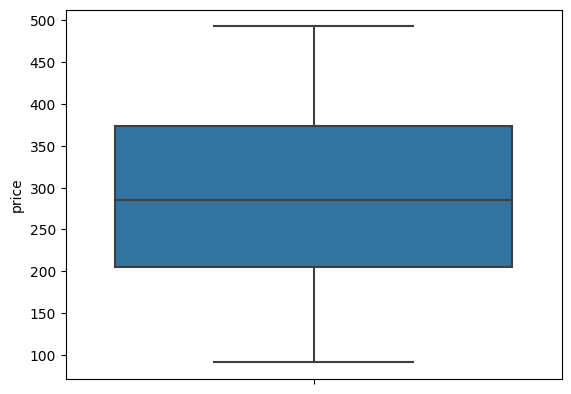

In [15]:
sns.boxplot(y='price', data = df)
plt.show()
plt.close()

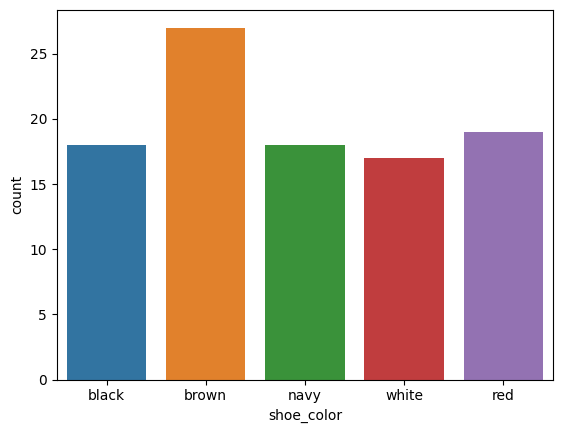

In [16]:
sns.countplot(x='shoe_color', data=df)
plt.show()
plt.close()

In [13]:
df.shoe_color.value_counts()

shoe_color
brown    27
red      19
black    18
navy     18
white    17
Name: count, dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price
98,26210,Marilyn,Finch,MarilynFinch92@gmail.com,sandals,leather,black,NaN


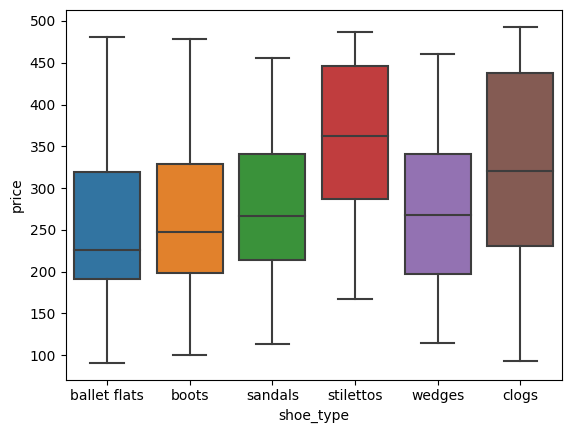

In [19]:
sns.boxplot(x='shoe_type', y='price', data=df)
plt.show()
plt.close()

In [23]:
df.groupby(['shoe_type']).agg(
    buyers=('id', 'count'),
    total_price=('price', 'sum'),
    avg_price=('price', 'mean')
).reset_index().sort_values(by='avg_price', ascending=True)

,shoe_type,buyers,total_price,avg_price
0,ballet flats,15,3840.0,256.000000
1,boots,19,5086.0,267.684211
3,sandals,17,4386.0,274.125000
5,wedges,18,5000.0,277.777778
2,clogs,16,4970.0,310.625000
4,stilettos,14,5053.0,360.928571


In [36]:
df.groupby('shoe_type').price.max() \
  .reset_index() \
  .sort_values(by='price', ascending=True) \
  .reset_index(drop=True)

,shoe_type,price
0,sandals,456.0
1,wedges,461.0
2,boots,478.0
3,ballet flats,481.0
4,stilettos,487.0
5,clogs,493.0


In [35]:
df.groupby('shoe_type').price.max() \
    .sort_values(ascending=True) \
    .reset_index()

,shoe_type,price
0,sandals,456.0
1,wedges,461.0
2,boots,478.0
3,ballet flats,481.0
4,stilettos,487.0
5,clogs,493.0


In [37]:
df2 = df.groupby('shoe_type').price.max() \
    .sort_values(ascending=True) \
    .reset_index()
df2

,shoe_type,price
0,sandals,456.0
1,wedges,461.0
2,boots,478.0
3,ballet flats,481.0
4,stilettos,487.0
5,clogs,493.0


In [47]:
df2 = df2.rename(columns={"price": "max_price"})
df2 = df2.rename(columns={"max_price": "max_price($)"})
df2

,shoe_type,max_price($)
0,sandals,456.0
1,wedges,461.0
2,boots,478.0
3,ballet flats,481.0
4,stilettos,487.0
5,clogs,493.0


In [54]:
df4 = df.copy()

In [55]:
df4.head()

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name
0,41874,Kyle,Peck,KylePeck71@gmail.com,ballet flats,faux-leather,black,385.0,Kyle Peck
1,31349,Elizabeth,Velazquez,EVelazquez1971@gmail.com,boots,fabric,brown,388.0,Elizabeth Velazquez
2,43416,Keith,Saunders,KS4047@gmail.com,sandals,leather,navy,346.0,Keith Saunders
3,56054,Ryan,Sweeney,RyanSweeney14@outlook.com,sandals,fabric,brown,344.0,Ryan Sweeney
4,77402,Donna,Blankenship,DB3807@gmail.com,stilettos,fabric,brown,289.0,Donna Blankenship


In [56]:
df4['name'] = df4['first_name'] + ' ' + df4['last_name']

In [57]:
df4.head()

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name
0,41874,Kyle,Peck,KylePeck71@gmail.com,ballet flats,faux-leather,black,385.0,Kyle Peck
1,31349,Elizabeth,Velazquez,EVelazquez1971@gmail.com,boots,fabric,brown,388.0,Elizabeth Velazquez
2,43416,Keith,Saunders,KS4047@gmail.com,sandals,leather,navy,346.0,Keith Saunders
3,56054,Ryan,Sweeney,RyanSweeney14@outlook.com,sandals,fabric,brown,344.0,Ryan Sweeney
4,77402,Donna,Blankenship,DB3807@gmail.com,stilettos,fabric,brown,289.0,Donna Blankenship


In [ ]:
df4.groupby('shoe_type').price \
    .apply(lambda x: np.percentile(x,75)) \
    .reset_index()

,shoe_type,price
0,ballet flats,319.50
1,boots,329.00
2,clogs,437.50
3,sandals,NaN
4,stilettos,445.75
5,wedges,341.25


In [61]:
df4.groupby('shoe_type').price \
    .apply(lambda x: np.percentile(x,25)) \
    .reset_index()

,shoe_type,price
0,ballet flats,191.50
1,boots,199.00
2,clogs,230.75
3,sandals,NaN
4,stilettos,286.75
5,wedges,197.25


In [62]:
df4.groupby('shoe_color').price \
    .apply(lambda x: np.percentile(x,75)) \
    .reset_index()

,shoe_color,price
0,black,NaN
1,brown,333.5
2,navy,365.5
3,red,432.5
4,white,324.0


In [63]:
df4.groupby('shoe_color').price \
    .apply(lambda x: np.percentile(x,25)) \
    .reset_index()

,shoe_color,price
0,black,NaN
1,brown,193.5
2,navy,205.5
3,red,250.0
4,white,196.0


In [65]:
df4[df4['shoe_color']=='black']['price'].unique()

array([385., 395., 171., 451., 100., 114., 286., 285., 289., 283., 115.,
       221., 242., 226., 374.,  nan])

In [74]:
df4[df4['shoe_color']=='black']

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name
0,41874,Kyle,Peck,KylePeck71@gmail.com,ballet flats,faux-leather,black,385.0,Kyle Peck
6,19998,Judith,Hewitt,JudithHewitt98@gmail.com,stilettos,leather,black,395.0,Judith Hewitt
23,49817,Katherine,Jensen,Katherine.Jensen@gmail.com,boots,fabric,black,171.0,Katherine Jensen
27,63898,Amber,Gross,Amber.Gross@gmail.com,stilettos,leather,black,451.0,Amber Gross
36,24421,Megan,Rhodes,MR1115@gmail.com,boots,fabric,black,100.0,Megan Rhodes
42,50912,Nicole,Morgan,NicoleMorgan51@hotmail.com,boots,faux-leather,black,114.0,Nicole Morgan
43,26090,Jacob,Callahan,JacobCallahan54@gmail.com,stilettos,leather,black,286.0,Jacob Callahan
46,72787,Patrick,Keller,PatrickKeller42@outlook.com,stilettos,fabric,black,285.0,Patrick Keller
48,36015,Richard,Forbes,RForbes1973@gmail.com,wedges,faux-leather,black,289.0,Richard Forbes
57,74824,Abigail,Johns,Abigail.Johns@gmail.com,wedges,fabric,black,283.0,Abigail Johns


In [81]:
df4[(df4['shoe_color']=='black') & (df4['shoe_type']=='sandals')]

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name
98,26210,Marilyn,Finch,MarilynFinch92@gmail.com,sandals,leather,black,406.8,Marilyn Finch


In [75]:
df4[(df4['shoe_color']=='black') & (df4['shoe_material']=='leather')]

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name
6,19998,Judith,Hewitt,JudithHewitt98@gmail.com,stilettos,leather,black,395.0,Judith Hewitt
27,63898,Amber,Gross,Amber.Gross@gmail.com,stilettos,leather,black,451.0,Amber Gross
43,26090,Jacob,Callahan,JacobCallahan54@gmail.com,stilettos,leather,black,286.0,Jacob Callahan
61,17784,Louis,Miranda,LouisMiranda65@gmail.com,clogs,leather,black,451.0,Louis Miranda
90,47183,Cynthia,Duffy,CDuffy1983@gmail.com,clogs,leather,black,451.0,Cynthia Duffy
98,26210,Marilyn,Finch,MarilynFinch92@gmail.com,sandals,leather,black,NaN,Marilyn Finch


In [ ]:
avg_price = df4[(df4['shoe_color']=='black') & (df4['shoe_material']=='leather')]['price'].mean()
df4.loc[(df4['shoe_color']=='black') & (df4['price'].isna()), 'price'] = avg_price

In [79]:
df4[(df4['shoe_color'] == 'black') & (df4['shoe_material']=='leather')]

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name
6,19998,Judith,Hewitt,JudithHewitt98@gmail.com,stilettos,leather,black,395.0,Judith Hewitt
27,63898,Amber,Gross,Amber.Gross@gmail.com,stilettos,leather,black,451.0,Amber Gross
43,26090,Jacob,Callahan,JacobCallahan54@gmail.com,stilettos,leather,black,286.0,Jacob Callahan
61,17784,Louis,Miranda,LouisMiranda65@gmail.com,clogs,leather,black,451.0,Louis Miranda
90,47183,Cynthia,Duffy,CDuffy1983@gmail.com,clogs,leather,black,451.0,Cynthia Duffy
98,26210,Marilyn,Finch,MarilynFinch92@gmail.com,sandals,leather,black,406.8,Marilyn Finch


In [80]:
df4.groupby('shoe_color').price \
    .apply(lambda x: np.percentile(x,75)) \
    .reset_index()

,shoe_color,price
0,black,392.5
1,brown,333.5
2,navy,365.5
3,red,432.5
4,white,324.0


In [82]:
df4.groupby('shoe_color').price \
    .apply(lambda x: np.percentile(x,25)) \
    .reset_index()

,shoe_color,price
0,black,222.25
1,brown,193.50
2,navy,205.50
3,red,250.00
4,white,196.00


In [84]:
df4.groupby(['shoe_type', 'shoe_color']).id.count() \
    .reset_index()

,shoe_type,shoe_color,id
0,ballet flats,black,2
1,ballet flats,brown,5
2,ballet flats,red,3
3,ballet flats,white,5
4,boots,black,3
5,boots,brown,5
6,boots,navy,6
7,boots,red,2
8,boots,white,3
9,clogs,black,4


In [ ]:
# Syntax for Pivot 
df.pivot(columns='ColumnToPivot',
    index='ColumnToBeRows',
    values='ColumnToBeValues')

In [85]:
df4.groupby(['shoe_type', 'shoe_color']).id.count().reset_index().pivot(columns='shoe_type', index='shoe_color', values='id')

shoe_type,ballet flats,boots,clogs,sandals,stilettos,wedges
shoe_color,,,,,,
black,2.0,3.0,4.0,1.0,5.0,3.0
brown,5.0,5.0,6.0,4.0,3.0,4.0
navy,NaN,6.0,1.0,5.0,2.0,4.0
red,3.0,2.0,4.0,3.0,2.0,5.0
white,5.0,3.0,1.0,4.0,2.0,2.0


In [87]:
df4.groupby(['shoe_type', 'shoe_color']).price.mean().reset_index().pivot(columns='shoe_type', index='shoe_color', values='price').reset_index()

shoe_type,shoe_color,ballet flats,boots,clogs,sandals,stilettos,wedges
0,black,305.500000,128.333333,341.250000,406.80,358.200000,229.00
1,brown,269.600000,280.400000,236.666667,236.25,373.666667,276.25
2,navy,NaN,309.666667,493.000000,260.00,327.000000,267.75
3,red,262.666667,341.000000,342.000000,270.00,452.000000,359.20
4,white,218.600000,253.000000,324.000000,332.75,291.500000,170.50


In [88]:
df4.head()

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name
0,41874,Kyle,Peck,KylePeck71@gmail.com,ballet flats,faux-leather,black,385.0,Kyle Peck
1,31349,Elizabeth,Velazquez,EVelazquez1971@gmail.com,boots,fabric,brown,388.0,Elizabeth Velazquez
2,43416,Keith,Saunders,KS4047@gmail.com,sandals,leather,navy,346.0,Keith Saunders
3,56054,Ryan,Sweeney,RyanSweeney14@outlook.com,sandals,fabric,brown,344.0,Ryan Sweeney
4,77402,Donna,Blankenship,DB3807@gmail.com,stilettos,fabric,brown,289.0,Donna Blankenship


### How to create a new column using where / if-else statements

In [90]:
df[df.isnull().any(axis=1)]

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name
98,26210,Marilyn,Finch,MarilynFinch92@gmail.com,sandals,leather,black,NaN,Marilyn Finch


In [91]:
df_test = df.copy()

In [92]:
df_test['is_priced'] = np.where(df_test['price'].isnull(), 'False', 'True')

In [93]:
df_test.head()

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name,is_priced
0,41874,Kyle,Peck,KylePeck71@gmail.com,ballet flats,faux-leather,black,385.0,Kyle Peck,True
1,31349,Elizabeth,Velazquez,EVelazquez1971@gmail.com,boots,fabric,brown,388.0,Elizabeth Velazquez,True
2,43416,Keith,Saunders,KS4047@gmail.com,sandals,leather,navy,346.0,Keith Saunders,True
3,56054,Ryan,Sweeney,RyanSweeney14@outlook.com,sandals,fabric,brown,344.0,Ryan Sweeney,True
4,77402,Donna,Blankenship,DB3807@gmail.com,stilettos,fabric,brown,289.0,Donna Blankenship,True


In [94]:
df_test[df_test.isnull().any(axis=1)]

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name,is_priced
98,26210,Marilyn,Finch,MarilynFinch92@gmail.com,sandals,leather,black,NaN,Marilyn Finch,False


In [95]:
df_test_2 = df.copy()

In [96]:
df_test_2['is_priced'] = ~df_test_2 \
    .price.isnull()

In [98]:
df_test_2[df_test_2.isnull().any(axis=1)]

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price,name,is_priced
98,26210,Marilyn,Finch,MarilynFinch92@gmail.com,sandals,leather,black,NaN,Marilyn Finch,False


### A/B Testing Assignment - Codeacademy

In [ ]:
import pandas as pd
import numpy as np

ad_clicks = pd.read_csv('ad_clicks.csv')

# Examine the first few rows of ad_clicks.
print(ad_clicks.head())

# Your manager wants to know which ad platform is getting you the most views. How many views (i.e., rows of the table) came from each utm_source?
views_per_source = ad_clicks.groupby('utm_source').user_id.count().reset_index().sort_values(by='user_id', ascending=False)
print(views_per_source)

# If the column ad_click_timestamp is not null, then someone actually clicked on the ad that was displayed. Create a new column called is_click, which is True if ad_click_timestamp is not null and False otherwise.
ad_clicks['is_click'] = np.where(ad_clicks['ad_click_timestamp'].isnull(), 'False', 'True')
print(ad_clicks.head())

# We want to know the percent of people who clicked on ads from each utm_source. Start by grouping by utm_source and is_click and counting the number of user_id‘s in each of those groups. Save your answer to the variable clicks_by_source.
clicks_by_source = ad_clicks.groupby(['utm_source', 'is_click']).user_id.count().reset_index()
print(clicks_by_source)

# Now let’s pivot the data so that the columns are is_click (either True or False), the index is utm_source, and the values are user_id. Save your results to the variable clicks_pivot.
clicks_pivot = clicks_by_source.pivot(columns = 'is_click', index = 'utm_source', values = 'user_id').reset_index()
print(clicks_pivot)

# Create a new column in clicks_pivot called percent_clicked which is equal to the percent of users who clicked on the ad from each utm_source. Was there a difference in click rates for each source?
clicks_pivot['percent_clicked'] = clicks_pivot['True'] / (clicks_pivot['True'] + clicks_pivot['False'])
print(clicks_pivot)

# The column experimental_group tells us whether the user was shown Ad A or Ad B. Were approximately the same number of people shown both ads?
views_per_group = ad_clicks.groupby('experimental_group').user_id.count().reset_index()
print(views_per_group)

# Using the column is_click that we defined earlier, check to see if a greater percentage of users clicked on Ad A or Ad B
clicks_per_group = ad_clicks.groupby(['experimental_group', 'is_click']).user_id.count().reset_index().pivot(columns='is_click', index='experimental_group', values='user_id')
clicks_per_group['percent_clicked'] = clicks_per_group['True'] / (clicks_per_group['True'] + clicks_per_group['False'])
print(clicks_per_group)

# The Product Manager for the A/B test thinks that the clicks might have changed by day of the week. Start by creating two DataFrames: a_clicks and b_clicks, which contain only the results for A group and B group, respectively.
a_clicks = ad_clicks[ad_clicks['experimental_group']=='A']
b_clicks = ad_clicks[ad_clicks['experimental_group']=='B']
print(a_clicks)
print(b_clicks)

# For each group (a_clicks and b_clicks), calculate the percent of users who clicked on the ad by day.
clicks_per_a_group = a_clicks.groupby(['day', 'is_click']).user_id.count().reset_index().sort_values(by='day', ascending=True).pivot(columns='is_click', index='day', values='user_id')
print(clicks_per_a_group)

clicks_per_b_group = b_clicks.groupby(['day', 'is_click']).user_id.count().reset_index().sort_values(by='day', ascending=True).pivot(columns='is_click', index='day', values='user_id')
print(clicks_per_b_group)

clicks_per_a_group['percent_clicked'] = clicks_per_a_group['True'] / (clicks_per_a_group['True'] + clicks_per_a_group['False'])
print(clicks_per_a_group)

clicks_per_b_group['percent_clicked'] = clicks_per_b_group['True'] / (clicks_per_b_group['True'] + clicks_per_b_group['False'])
print(clicks_per_b_group)